# Project Overview: Analyzing Vegetable Price Trends
<p style="text-align:center;"><img src="https://media.citizen.co.za/wp-content/uploads/2023/12/household-food-basket-prices.jpg" width=700 height=700></p>

## Introduction
Understanding the dynamics of vegetable prices is essential for both policymakers and consumers in India, given the significant impact it has on food security and economic well-being. This project focuses on exploring and analyzing a dataset that provides detailed information on vegetable prices across various regions of India. Collected from the authoritative source, the Agricultural Marketing Information Network (AGMARKNET), this dataset offers valuable insights into the fluctuating prices of 10 different types of vegetables over the course of a year.

### Dataset Description:
The dataset comprises information on the prices of 10 commonly consumed vegetables in India over a span of one year. Each entry in the dataset includes the type of vegetable, the price at which it was sold, and the corresponding timestamp indicating the date of sale. With data collected from diverse regions across India, the dataset facilitates an in-depth analysis of regional variations and seasonal trends in vegetable prices.

## Importing Packages

In [71]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Data Cleaning

Load the data, 
check, and change data to the correct Data types. 
For Example, The price date was an Object. This would impact our EDA section should we decide to visualize the date or make use of a trend Line

In [15]:
!kaggle datasets download -d ksamiksha19/vegetable-prices

Dataset URL: https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices
License(s): other




  0%|          | 0.00/2.87k [00:00<?, ?B/s]
100%|##########| 2.87k/2.87k [00:00<00:00, 2.94MB/s]


In [17]:
import pandas as pd
df = pd.read_csv('prices.csv')
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [18]:
df['Price Dates'] =pd.to_datetime(df["Price Dates"], format=  "%d-%m-%Y")
print(df['Price Dates'].dtypes)

datetime64[ns]


In [16]:
df.isna().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

## Exploratory Data Analysis (EDA)

In [13]:
df.describe()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973


In [19]:
df['month'] = df['Price Dates'].dt.month
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),month
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,1
1,2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25,1
2,2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25,1
3,2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25,1
4,2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25,1


In [22]:
df.groupby(by='month')[['Tomato','Onion','Potato','Brinjal','Garlic','Peas','Methi','Green Chilli','Elephant Yam (Suran)']].sum()

,Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
month,,,,,,,,,
1,290,313.5,367,710,1300,471,186,695.00,510
2,384,292.5,359,786,1770,745,195,962.00,660
3,416,296.0,354,576,2055,1000,187,1185.00,649
4,384,224.5,372,580,1975,1631,315,910.13,650
5,400,267.0,508,610,2305,1575,288,939.00,615
6,400,343.0,507,820,2450,1610,399,1380.00,619
7,400,414.0,493,855,3585,2640,2358,1825.00,767
8,400,537.0,505,775,3910,1930,225,1070.00,891
9,368,537.0,427,552,3720,1640,388,885.00,649


In [23]:
df.groupby(by='month')[['Tomato','Onion','Potato','Brinjal','Garlic','Peas','Methi','Green Chilli','Elephant Yam (Suran)']].mean()

,Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
month,,,,,,,,,
1,16.111111,17.416667,20.388889,39.444444,72.222222,26.166667,10.333333,38.611111,28.333333
2,16.000000,12.187500,14.958333,32.750000,73.750000,31.041667,8.125000,40.083333,27.500000
3,16.000000,11.384615,13.615385,22.153846,79.038462,38.461538,7.192308,45.576923,24.961538
4,16.000000,9.354167,15.500000,24.166667,82.291667,67.958333,13.125000,37.922083,27.083333
5,16.000000,10.680000,20.320000,24.400000,92.200000,63.000000,11.520000,37.560000,24.600000
6,16.000000,13.720000,20.280000,32.800000,98.000000,64.400000,15.960000,55.200000,24.760000
7,16.000000,16.560000,19.720000,34.200000,143.400000,105.600000,94.320000,73.000000,30.680000
8,16.000000,21.480000,20.200000,31.000000,156.400000,77.200000,9.000000,42.800000,35.640000
9,16.000000,23.347826,18.565217,24.000000,161.739130,71.304348,16.869565,38.478261,28.217391


In [118]:
Months = df['month']
bhindi_prices = df['Bhindi (Ladies finger)']

In [ ]:
plt.figure(figsize=(9, 6))

plt.bar(Months, bhindi_prices, color='green', label='Bhindi (Ladies finger)')
plt.xlabel('Months')
plt.ylabel('bhindi_prices')
plt.title('Bhindi Prices Over Months')

plt.show()

In [120]:
dates = df['Price Dates']

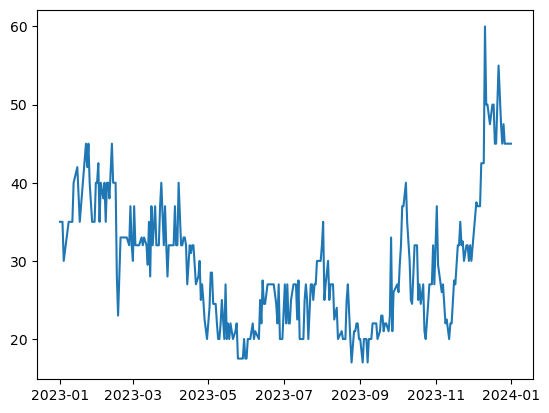

In [121]:
plt.plot(figsize=(12, 6))
plt.plot(dates, bhindi_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [122]:
Months = df['month']
Tomato_prices = df['Tomato']

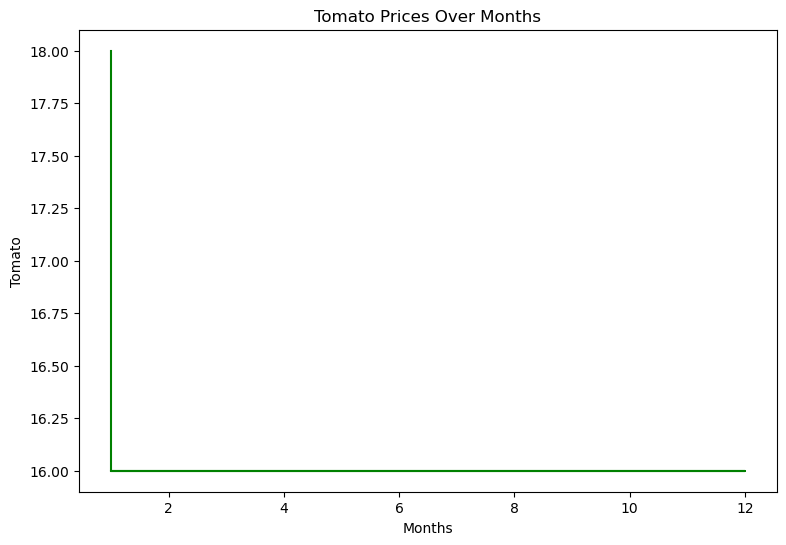

In [125]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Tomato_prices, color='green', label='Tomato')
plt.xlabel('Months')
plt.ylabel('Tomato')
plt.title('Tomato Prices Over Months')

plt.show()

In [126]:
dates = df['Price Dates']

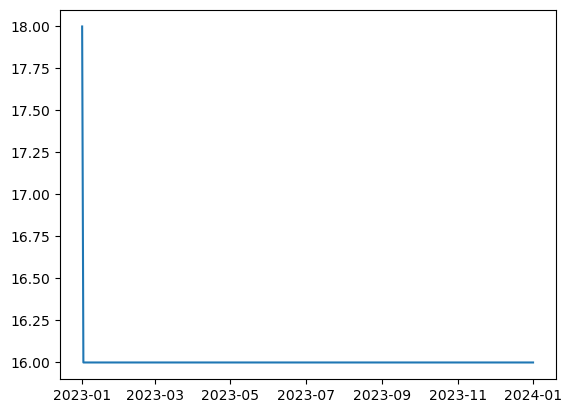

In [127]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Tomato_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [60]:
Months = df['month']
Onion_prices = df['Onion']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Onion_prices, color='green', label='Onion')
plt.xlabel('Months')
plt.ylabel('Onion_prices')
plt.title('Onion Prices Over Months')

plt.show()

In [75]:
dates = df['Price Dates']

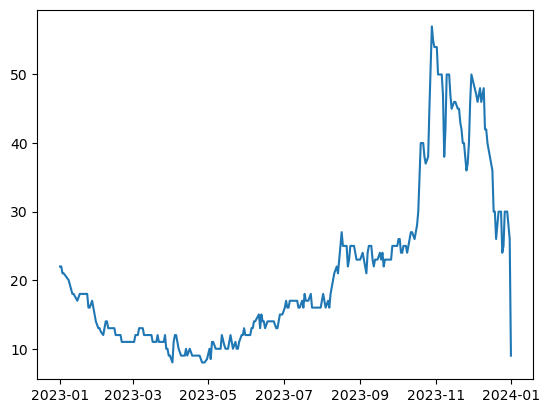

In [76]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Onion_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [67]:
Months = df['month']
Potato_prices = df['Potato']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Potato_prices, color='green', label='Potato')
plt.xlabel('Months')
plt.ylabel('Potato_prices')
plt.title('Potato Prices Over Months')

plt.show()

In [77]:
dates = df['Price Dates']

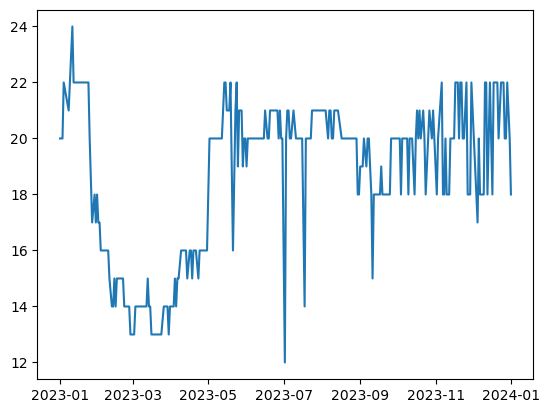

In [78]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Potato_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [80]:
Months = df['month']
Brinjal_prices = df['Brinjal']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Brinjal_prices, color='green', label='Brinjal')
plt.xlabel('Months')
plt.ylabel('Brinjal_prices')
plt.title('Brinjal Prices Over Months')

plt.show()

In [82]:
dates = df['Price Dates']

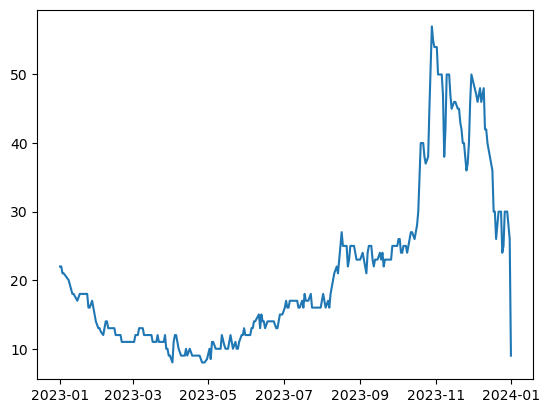

In [83]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Onion_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [84]:
Months = df['month']
Garlic_prices = df['Garlic']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Garlic_prices, color='green', label='Garlic')
plt.xlabel('Months')
plt.ylabel('Garlic_prices')
plt.title('Garlic Prices Over Months')

plt.show()

In [ ]:
dates = df['Price Dates']

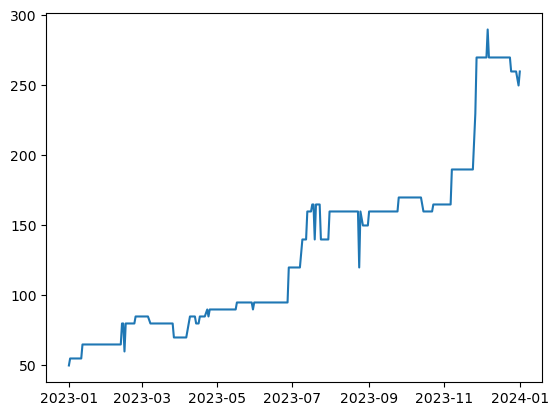

In [86]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Garlic_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [87]:
Months = df['month']
Peas_prices = df['Peas']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Peas_prices, color='green', label='Peas')
plt.xlabel('Months')
plt.ylabel('Peas_prices')
plt.title('Peas Prices Over Months')

plt.show()

In [89]:
dates = df['Price Dates']

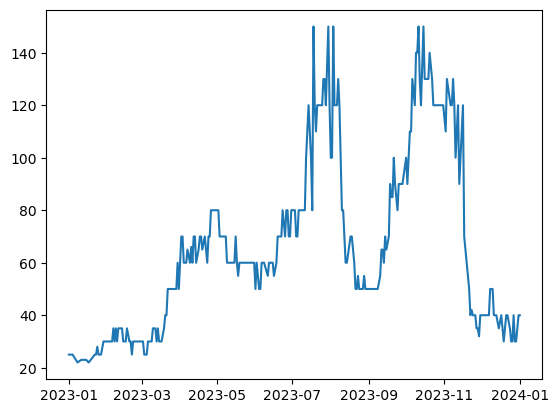

In [90]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Peas_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [91]:
Months = df['month']
Methi_prices = df['Methi']

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Methi_prices, color='green', label='Methi')
plt.xlabel('Months')
plt.ylabel('Methi_prices')
plt.title('Methi Prices Over Months')

plt.show()

In [92]:
dates = df['Price Dates']

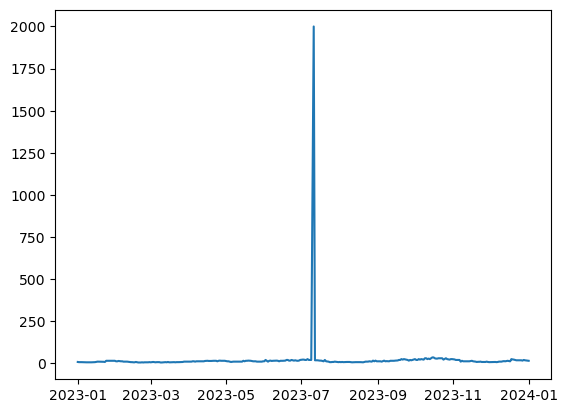

In [93]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Methi_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [98]:
Months = df['month']
Green_chilli_prices = df['Green_chilli']

KeyError: 'Green_chilli'

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Green_chilli_prices, color='green', label='Green_chilli')
plt.xlabel('Months')
plt.ylabel('Green_chilli_prices')
plt.title('Green_chilli Prices Over Months')

plt.show()

In [ ]:
dates = df['Price Dates']

In [ ]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Green_chilli_prices)

# Show the plotdates = df['Price Dates']
plt.show()

In [102]:
Months = df['month']
Elephgant Yam_prices = df['Elephant Yam(Suran)']

SyntaxError: invalid syntax (2003103375.py, line 2)

In [103]:
plt.figure(figsize=(9, 6))

plt.plot(Months, Elepant_Yam_prices, color='green', label='Elephant_Yam(Suran)')
plt.xlabel('Months')
plt.ylabel('Elephant_Yam_prices')
plt.title('Elephant Yam Prices Over Months')

plt.show()

NameError: name 'Elepant_Yam_prices' is not defined

<Figure size 900x600 with 0 Axes>

In [104]:
dates = df['Price Dates']

In [105]:
plt.plot(figsize=(12, 6))
plt.plot(dates, Elephant yam_prices)

# Show the plotdates = df['Price Dates']
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3765873648.py, line 2)

## Conclusion and Insights